# Reading Data

In [1]:
import pandas as pd
import  numpy as np
import os

In [2]:
df=pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [3]:
df1 = df[["reviews.rating", "reviews.text"]]
df1.head()

,reviews.rating,reviews.text
0,3,I thought it would be as big as small paper bu...
1,5,This kindle is light and easy to use especiall...
2,4,Didnt know how much i'd use a kindle so went f...
3,5,I am 100 happy with my purchase. I caught it o...
4,5,Solid entry level Kindle. Great for kids. Gift...


# Preprocessing

In [4]:
#Making Corpus from the reviews to clean it
corpus = df1["reviews.text"].tolist()

In [5]:
from nltk.corpus import stopwords
from string import punctuation
stuff_to_be_removed = list(stopwords.words("english"))+list(punctuation)
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Devyani\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [6]:
# Tokenizing, Lemmatizing, Removing Stopwords and non english words

final_corpus= []
for i in range(len(corpus)):
    text = word_tokenize(corpus[i].lower())
    text = [t for t in text if len(t) > 2]
    text = [lemmatizer.lemmatize(y) for y in text if y not in stuff_to_be_removed]
    sent = " ".join(text)
    sent = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
         if w.lower() in words or not w.isalpha())
        
    
    final_corpus.append(sent)

In [7]:
new_df = pd.DataFrame(final_corpus)
new_df["reviews.rating"] = df1["reviews.rating"]
new_df.columns = ["text", "rating"]

In [8]:
new_df.head()

,text,rating
0,thought would big small paper turn like palm t...,3
1,kindle light easy use especially beach,5
2,didnt know much use kindle went lower end happ...,4
3,100 happy purchase caught sale really good pri...,5
4,solid entry level kindle great gifted friend l...,5


In [9]:
# Making corpus from the cleaned reviews to extract Adjectives

corpus1 = new_df["text"].tolist()

In [10]:
import string
from nltk import pos_tag, pos_tag_sents
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

In [11]:
# Extracting Adjectives

final_corpus1= []
for i in range(len(corpus1)):
    jj = word_tokenize(corpus1[i])
    jj = [word for word, pos in pos_tag(jj) if pos.startswith('JJ')]
    sentjj = " ".join(jj)
    
    final_corpus1.append(sentjj)

In [12]:
new_df1 = pd.DataFrame(final_corpus1)

In [13]:
new_df1["text"] =new_df["text"]
new_df1["rating"] =new_df["rating"]
new_df1.columns = ["pos", "text" ,"rating"]

In [14]:
new_df1.head()

,pos,text,rating
0,big small small comfortable regular,thought would big small paper turn like palm t...,3
1,light easy,kindle light easy use especially beach,5
2,kindle lower happy little,didnt know much use kindle went lower end happ...,4
3,happy good real old portable fit better giant ...,100 happy purchase caught sale really good pri...,5
4,solid great read good higher,solid entry level kindle great gifted friend l...,5


In [15]:
#Make a corpus to find the count for the adjectives in each review

corpus2 = new_df1["pos"].tolist()

In [16]:
# Adjective Count

list_demo=[]
for i in range (len(corpus2)):
   counts = dict()
   words = corpus2[i].split(" ")
   for word in words:
       if word in counts:
           counts[word] += 1
       else:
           counts[word] = 1
   list_demo.append(counts)

In [17]:
new = pd.DataFrame(pd.Series(list_demo).reset_index()).set_axis(['Key','Value'],1,inplace=False)

In [18]:
new.head()

,Key,Value
0,0,"{'big': 1, 'small': 2, 'comfortable': 1, 'regu..."
1,1,"{'light': 1, 'easy': 1}"
2,2,"{'kindle': 1, 'lower': 1, 'happy': 1, 'little'..."
3,3,"{'happy': 1, 'good': 1, 'real': 1, 'old': 2, '..."
4,4,"{'solid': 1, 'great': 1, 'read': 1, 'good': 1,..."


In [19]:
new_df1["adj"] = new["Value"]

In [20]:
new_df1.head()

,pos,text,rating,adj
0,big small small comfortable regular,thought would big small paper turn like palm t...,3,"{'big': 1, 'small': 2, 'comfortable': 1, 'regu..."
1,light easy,kindle light easy use especially beach,5,"{'light': 1, 'easy': 1}"
2,kindle lower happy little,didnt know much use kindle went lower end happ...,4,"{'kindle': 1, 'lower': 1, 'happy': 1, 'little'..."
3,happy good real old portable fit better giant ...,100 happy purchase caught sale really good pri...,5,"{'happy': 1, 'good': 1, 'real': 1, 'old': 2, '..."
4,solid great read good higher,solid entry level kindle great gifted friend l...,5,"{'solid': 1, 'great': 1, 'read': 1, 'good': 1,..."


# Sentiment Analysis using TextBlob on Adjectives

In [21]:
from textblob import TextBlob

In [22]:
#Sentiment Analysis
#Corpus2 has adjectives for each review
senti= []
for i in range(len(corpus2)):
    blob = TextBlob(corpus2[i])
    sentiment = blob.sentiment
    
    senti.append(sentiment)

In [23]:
sentiment_all = pd.DataFrame(senti)
sentiment_all.head()

,polarity,subjectivity
0,-0.020000,0.355385
1,0.416667,0.766667
2,0.306250,0.750000
3,0.254167,0.510317
4,0.437500,0.487500


In [24]:
new_df1["Polarity"] =sentiment_all["polarity"]
new_df1["Subjectivity"] =sentiment_all["subjectivity"]

In [25]:
new_df1.head()

,pos,text,rating,adj,Polarity,Subjectivity
0,big small small comfortable regular,thought would big small paper turn like palm t...,3,"{'big': 1, 'small': 2, 'comfortable': 1, 'regu...",-0.020000,0.355385
1,light easy,kindle light easy use especially beach,5,"{'light': 1, 'easy': 1}",0.416667,0.766667
2,kindle lower happy little,didnt know much use kindle went lower end happ...,4,"{'kindle': 1, 'lower': 1, 'happy': 1, 'little'...",0.306250,0.750000
3,happy good real old portable fit better giant ...,100 happy purchase caught sale really good pri...,5,"{'happy': 1, 'good': 1, 'real': 1, 'old': 2, '...",0.254167,0.510317
4,solid great read good higher,solid entry level kindle great gifted friend l...,5,"{'solid': 1, 'great': 1, 'read': 1, 'good': 1,...",0.437500,0.487500


In [26]:
new_df1 = new_df1[['text', 'rating', 'pos', 'adj', 'Polarity', 'Subjectivity']]
new_df1.columns = ['Text','Rating','All_Adjectives','Adjective_Count','Sentiment_Polarity','Subjectivity']

# Sentiment Analysis Output

In [27]:
new_df1.head()

,Text,Rating,All_Adjectives,Adjective_Count,Sentiment_Polarity,Subjectivity
0,thought would big small paper turn like palm t...,3,big small small comfortable regular,"{'big': 1, 'small': 2, 'comfortable': 1, 'regu...",-0.020000,0.355385
1,kindle light easy use especially beach,5,light easy,"{'light': 1, 'easy': 1}",0.416667,0.766667
2,didnt know much use kindle went lower end happ...,4,kindle lower happy little,"{'kindle': 1, 'lower': 1, 'happy': 1, 'little'...",0.306250,0.750000
3,100 happy purchase caught sale really good pri...,5,happy good real old portable fit better giant ...,"{'happy': 1, 'good': 1, 'real': 1, 'old': 2, '...",0.254167,0.510317
4,solid entry level kindle great gifted friend l...,5,solid great read good higher,"{'solid': 1, 'great': 1, 'read': 1, 'good': 1,...",0.437500,0.487500


# Wordcloud

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

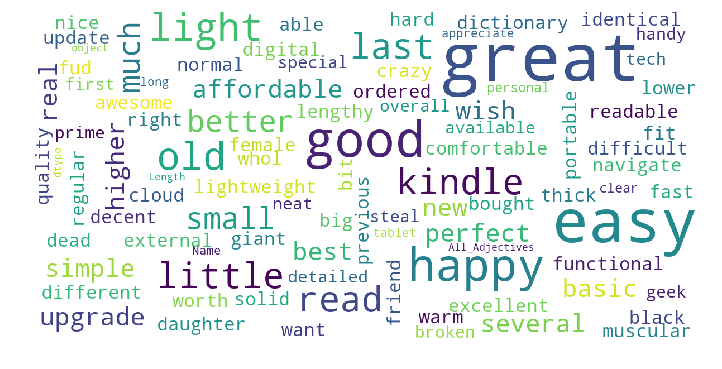

In [29]:
show_wordcloud(new_df1['All_Adjectives'])